## Домашнее задание 1 - Часть 1

### Множество Жюлиа

Для фиксированного комплексного числа **c**, множество Жюлиа **J(c)** — это множество комплексных чисел $\mathbf{z_0}$, для которых последовательность
$$
z_{i+1} = z_i^2 + c
$$
расходится.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

1. Постройте двумерный график ( по осям **Re(z), Im(z)**), при фиксированном **c** (в примере 0.1+0.5i) с использованием 2 цветов (один цвет для сходящейся точки, другой — для расходящейся).

In [6]:
import cmath

def iterate_until_nan(z_0: complex, c: complex, max_iterations: int = 20):
    """Iteration process to see if z_0 converges or diverges
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int: zero if the iteration diverged,
             one if we reach max_iterations and we still
             haven't reached nan
    """
    # РЕАЛИЗОВАТЬ ВОТ ТУТ
    z = z_0
    try:
        for i in range(1,max_iterations + 1):
            z = z**2 + c
            if cmath.isnan(z): return 0
    except OverflowError:
        #print(f"i={i}, z={z}")
        return 1
    if cmath.isnan(z): return 0
    else: return 1 # output

def julia_convergence(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = iterate_until_nan(complex(x,y), c) # call iterate_until_nan() function
    return img

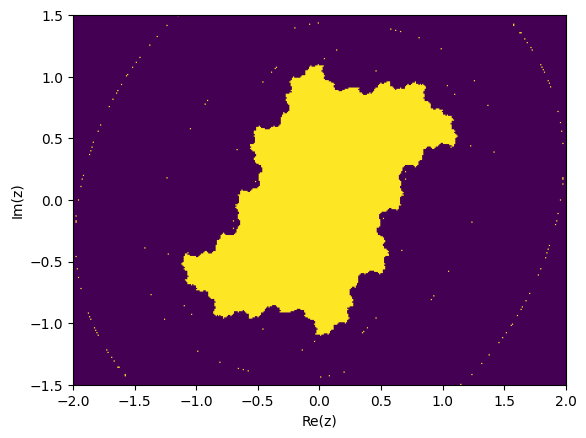

In [7]:
plt.imshow(julia_convergence(0.1+0.5j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

2. Придумайте логику из более чем двух цветов и нарисуйте картинку

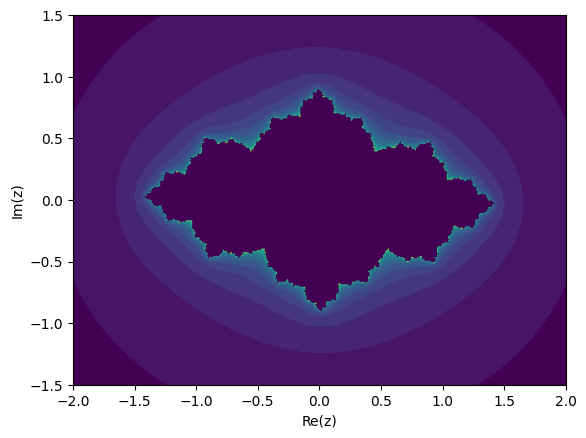

In [13]:
def julia(z_0: complex, c: complex = 1, n_iterations: int = 20):
    """Iteration process much like iterate_until_nan
       but you need think of some logic to give different
       values of z different colors
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int
    """
    # РЕАЛИЗОВАТЬ ВОТ ТУТ
    z = z_0
    try:
        for i in range(1,n_iterations + 1):
            z = z**2 + c
            if cmath.isnan(z): return 0
            if abs(z) > 4: return i
    except OverflowError:
        return 1
    if cmath.isnan(z): return 0
    else: return 1 # output

def julia_set(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = julia(complex(x,y), c) # call julia() function
    return img

plt.imshow(julia_set(-0.6-0.05j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

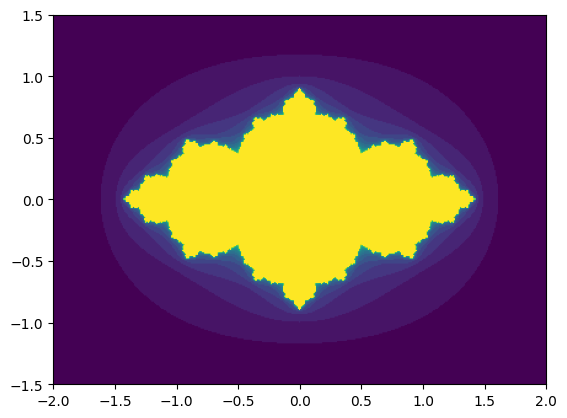

In [ ]:
# Нарисуйте похожую картинку

3. Нарисуйте множество Мандельброта (как в Википедии)

в чем разница?

Разница в том, что множество Мальдеброта строится при фиксированном z_0=(0,0) и переменных значениях коэффициента c. (Множество Жюлиа - фиксированное значение с и переменное значение z_0.)

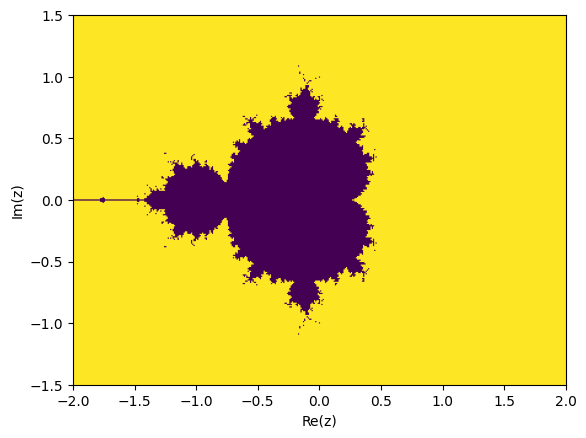

In [69]:
# Напишите здесь код
def julia(z_0: complex =0, c: complex = 1, n_iterations: int = 20):
    """Iteration process much like iterate_until_nan
       but you need think of some logic to give different
       values of z different colors
    Args:
        z_0: initial value of z
        c: value of c
        max_iterations: number of maximum iterations
    Returns:
        int
    """
    # РЕАЛИЗОВАТЬ ВОТ ТУТ
    z = z_0
    try:
        for i in range(1,n_iterations + 1):
            z = z**2 + c
            #if cmath.isnan(z): return 0
            if abs(z) > 2: return 1
    except OverflowError:
        return 1
    return 0

def julia_set(c, extent=[-2, 2, -1.5, 1.5], resulotion=0.01):
    W = int(abs(extent[1] - extent[0])/resulotion)+1
    H = int(abs(extent[2] - extent[3])/resulotion)+1
    img = np.empty((H ,W))
    for i,x in enumerate(np.linspace(extent[0],extent[1],W)):
        for j,y in enumerate(np.linspace(extent[2],extent[3],H)):
            img[j,i] = julia(complex(0,0), complex(x,y)) # call julia() function
    return img

plt.imshow(julia_set(-0.5+0.5j), extent=[-2, 2, -1.5, 1.5])
plt.xlabel("Re(z)")
plt.ylabel("Im(z)");

## Домашнее задание 1 - Часть 2

### профилировка

При запуске файла **script.py** выполняется некий расчет:

In [3]:
!python script.py

dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:15<00:00, 83.15it/s]


После выполнения расчета сохраняется картинка

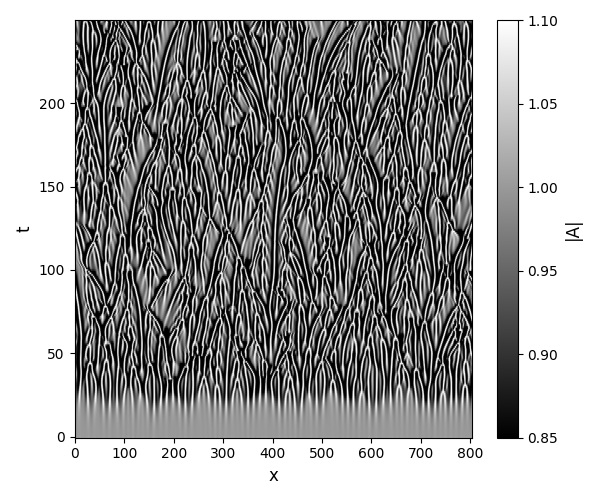

In [4]:
from PIL import Image

img = Image.open("./res.png")
display(img)

Задания:
1. Нарисовать график потребления памяти от времени исполнения **script.py**.
2. В файле **script.py** определены 8 функций. Построить график, наглядно демонстрирующий сколько времени проводится внутри каждой из этих 8 функций.  
   Если вызывается функция, которая вложена в другую, то время исполнения засчитывается обеим функциям
3. В файле **script.py** есть параметр **N**. Что будет с полной используемой памятью и временем исполнения если поварьировать этот параметр? Покажите, построив график. (Только уберите перед этим вызов функции **plot_1D_heatmap**)

Можно пользоваться любыми профилировщиками, вот примеры:
1. https://pypi.org/project/scalene/0.9.15/
2. https://docs.python.org/3/library/profile.html#module-profile
3. https://pypi.org/project/memory-profiler/

1. График потребления памяти

In [28]:
!pip install -U memory_profiler
from PIL import Image

In [15]:
!mprof run script.py

mprof: Sampling memory every 0.1s
running new process
running as a Python program...
dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
100% 1250/1250 [00:08<00:00, 139.18it/s]


Using last profile data.


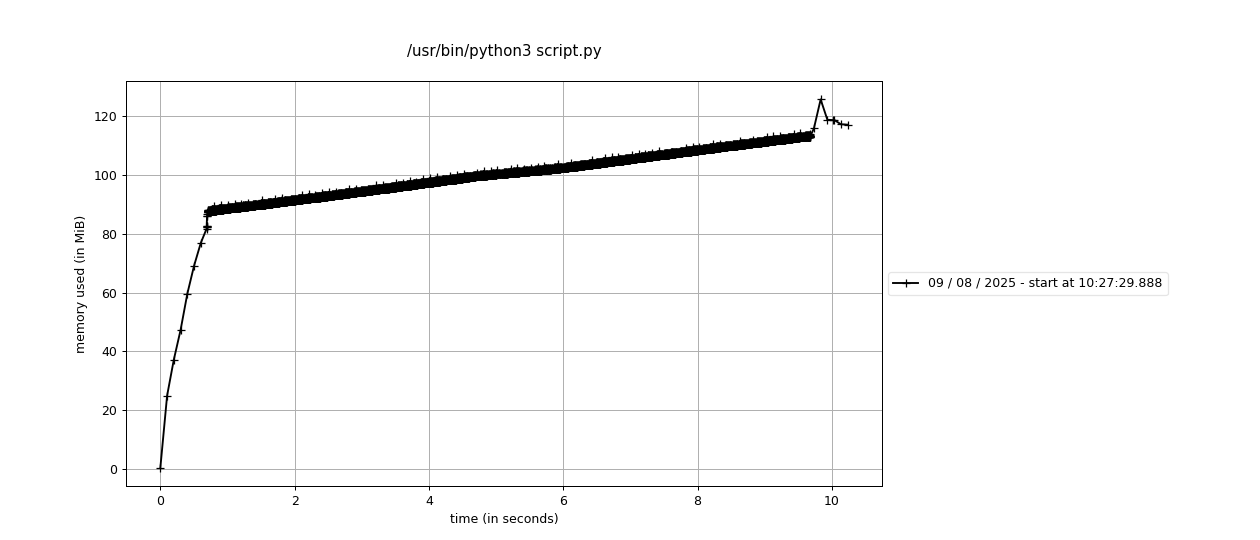

In [29]:
!mprof plot -n -o mprof_res.png

img = Image.open("./mprof_res.png")
display(img)

2. В файле script.py определены 8 функций. Построить график, наглядно демонстрирующий сколько времени проводится внутри каждой из этих 8 функций.

Using last profile data.


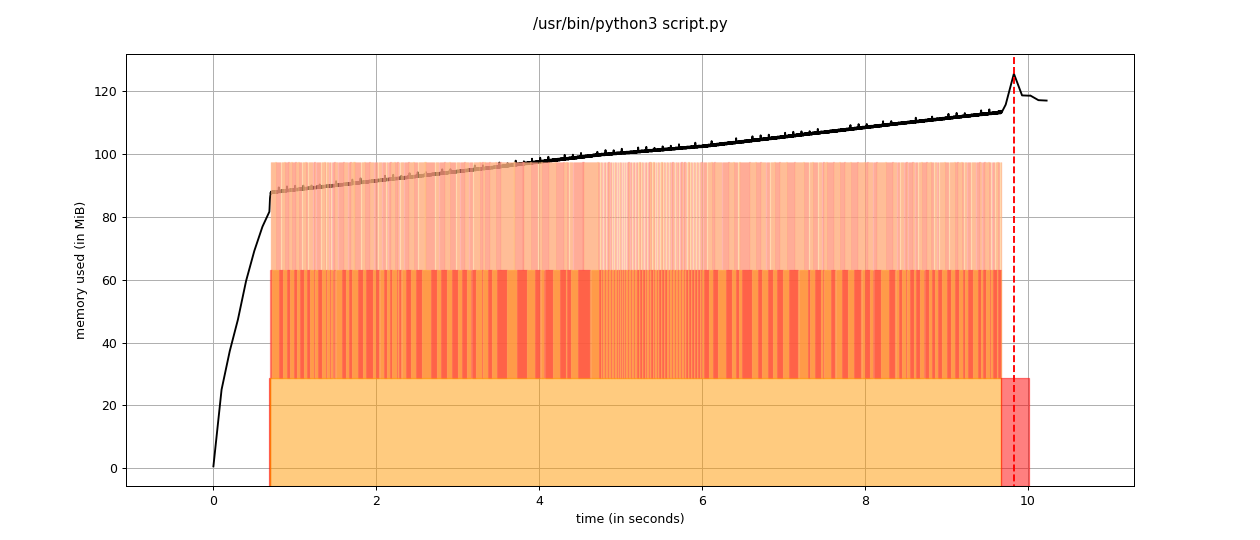

In [32]:
# В виде ступенчатого графика. Время нахождения в функции показывается вертикальной палкой

!mprof plot -f -o mprof_res_2.png

img = Image.open("./mprof_res_2.png")
display(img)

Using last profile data.


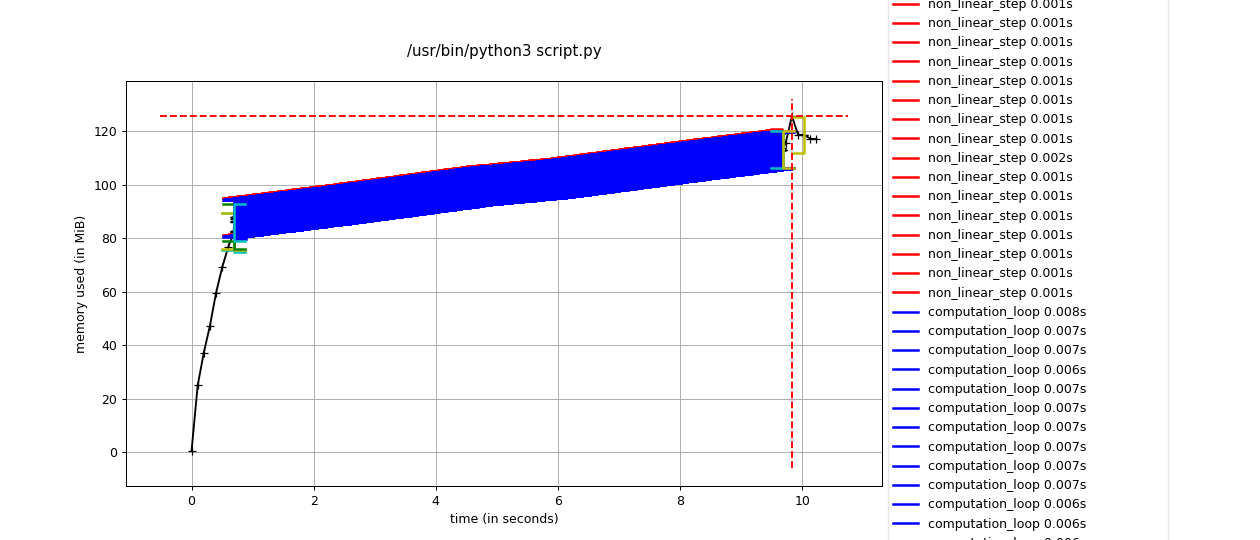

In [33]:
# В виде графика с отметками [ и ], видимо лучше для каждой функции построить свой график.
# для этого убрать из scrypt.py декоратор @profile для других функций

!mprof plot -o mprof_res_3.png

img = Image.open("./mprof_res_3.png")
display(img)

3. В файле script.py есть параметр N. Что будет с полной используемой памятью и временем исполнения если поварьировать этот параметр? Покажите, построив график. (Только уберите перед этим вызов функции plot_1D_heatmap)

In [27]:
from IPython.display import Image
display.Image("./mprof_res_2.png")

AttributeError: 'function' object has no attribute 'Image'

In [19]:
res.png

NameError: name 'res' is not defined

In [8]:
!scalene -h

usage: scalene [-h] [--outfile OUTFILE] [--html]
               [--profile-interval PROFILE_INTERVAL] [--wallclock]
               [--cpu-only] [--profile-all]

Scalene: a high-precision CPU and memory profiler.
        https://github.com/emeryberger/scalene
        % scalene yourprogram.py

options:
  -h, --help            show this help message and exit
  --outfile OUTFILE     file to hold profiler output (default: stdout)
  --html                output as HTML (default: text)
  --profile-interval PROFILE_INTERVAL
                        output profiles every so many seconds.
  --wallclock           use wall clock time (default: virtual time)
  --cpu-only            only profile CPU time (default: profile CPU, memory, and copying)
  --profile-all         profile all executed code, not just the target program (default: only the target program)


In [12]:
!scalene --profile-interval=10 --outfile outfile.txt script.py


dx: 0.062490110281203215
k_max:  8.000644433651335
k_min:  -8.000644433651335
dt: 0.1033418636049274
period: 5 n_frames: 250
  0% 0/1250 [00:00<?, ?it/s]